# 8 ROOT in Python
ROOT offers the possibility to interface to Python via a set of bindings called PyROOT. Python is used in a wide variety of application areas and one of the most used scripting languages today. With the help of PyROOT it becomes possible to combine the power of a scripting language with ROOT tools. Introductory material to Python is available from many sources on the web, see e. g. http://docs.python.org.

## 8.1 PyROOT
The access to ROOT classes and their methods in PyROOT is almost identical to C++ macros, except for the special language features of Python, most importantly dynamic type declaration at the time of assignment. Coming back to our first example, simply plotting a function in ROOT, the following C++ code:

In [1]:
import ROOT

Welcome to JupyROOT 6.08/00


In [2]:
%jsroot on

In [3]:
%%cpp

TCanvas canvas_8_1_a("canvas_8_1_a" ,"Data C++");
TF1 function_8_1_a("function_8_1_a","[0]*sin([1]*x)/x",0.,10.);
function_8_1_a.SetParameter(0,1);
function_8_1_a.SetParameter(1,1);
function_8_1_a.Draw();
canvas_8_1_a.Draw();

in Python becomes:

Notice: The above commands are not necessary in your environment!

In [4]:
#from ROOT import gStyle, TCanvas, TGraphErrors
canvas_8_1=ROOT.TCanvas("canvas_8_1" ,"Data Python" ,200 ,10 ,700 ,500)
f1 = ROOT.TF1("f2","[0]*sin([1]*x)/x",0.,10.)
f1.SetParameter(0,1);
f1.SetParameter(1,1);
f1.Draw();
canvas_8_1.Draw();

A slightly more advanced example hands over data defined in the macro to the ROOT class TGraphErrors. Note that a Python array can be used to pass data between Python and ROOT. The first line in the Python script allows it to be executed directly from the operating system, without the need to start the script from python or the highly recommended powerful interactive shell ipython. The last line in the python script is there to allow you to have a look at the graphical output in the ROOT canvas before it disappears upon termination of the script.

Here is the C++ version:

In [5]:
%%cpp
//
// Draw a graph with error bars and fit a function to it
//
gStyle->SetOptFit(111) ; //superimpose fit results
// make nice Canvas
auto *c1 = new TCanvas("c1" ,"Daten" ,200 ,10 ,700 ,500) ;
c1->SetGrid( ) ;
//define some data points ...
const Int_t n = 10;
Float_t x[n] = {-0.22, 0.1, 0.25, 0.35, 0.5, 0.61, 0.7, 0.85, 0.89, 1.1};
Float_t y[n] = {0.7, 2.9, 5.6, 7.4, 9., 9.6, 8.7, 6.3, 4.5, 1.1};
Float_t ey[n] = {.8 ,.7 ,.6 ,.5 ,.4 ,.4 ,.5 ,.6 ,.7 ,.8};
Float_t ex[n] = {.05 ,.1 ,.07 ,.07 ,.04 ,.05 ,.06 ,.07 ,.08 ,.05};
// and hand over to TGraphErros object
TGraphErrors *gr = new TGraphErrors(n,x,y,ex,ey);
gr->SetTitle("TGraphErrors with Fit") ;
// now perform a fit (with errors in x and y!)
gr->Fit("gaus");
gr->DrawClone("AP");
c1->Draw();

 FCN=1.53213 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=2.58725e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.54303e+00   3.54707e-01   2.49013e-04   5.51076e-04
   2  Mean         5.66472e-01   2.69815e-02   2.04103e-05   4.18957e-03
   3  Sigma        2.85465e-01   3.04454e-02   2.72043e-05   1.85906e-03


In Python it looks like this:

In [6]:
#
# Draw a graph with error bars and fit a function to it
#
from ROOT import gStyle, TCanvas, TGraphErrors
from array import array
canvas_8_2=ROOT.TCanvas("canvas_8_2" ,"TGraphErrors" ,200 ,10 ,700 ,500)
gStyle.SetOptFit (111) # superimpose fit results
canvas_8_1.SetGrid ()
#define some data points . . .
x = array('f', (-0.22, 0.1, 0.25, 0.35, 0.5, 0.61, 0.7, 0.85, 0.89, 1.1) )
y = array('f', (0.7, 2.9, 5.6, 7.4, 9., 9.6, 8.7, 6.3, 4.5, 1.1) )
ey = array('f', (.8 ,.7 ,.6 ,.5 ,.4 ,.4 ,.5 ,.6 ,.7 ,.8) )
ex = array('f', (.05 ,.1 ,.07 ,.07 ,.04 ,.05 ,.06 ,.07 ,.08 ,.05) )
nPoints=len ( x )
# . . . and hand over to TGraphErros object
gr=TGraphErrors ( nPoints , x , y , ex , ey )
gr.SetTitle("TGraphErrors with Fit")
gr.Draw ( "AP" ) 
gr.Fit("gaus") 
# canvas_8_1.Update () 
canvas_8_2.Update () 
canvas_8_2.Draw () 

 FCN=1.53213 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=2.57894e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.54303e+00   3.54707e-01   2.49013e-04   5.50385e-04
   2  Mean         5.66472e-01   2.69815e-02   2.04103e-05   4.18001e-03
   3  Sigma        2.85465e-01   3.04454e-02   2.72043e-05   1.85849e-03


Comparing the C++ and Python versions in these two examples, it now should be clear how easy it is to convert any ROOT Macro in C++ to a Python version.

As another example, let us revisit macro3 from Chapter 4. A straight-forward Python version relying on the ROOT class ```TMath```:

In [7]:
%jsroot off

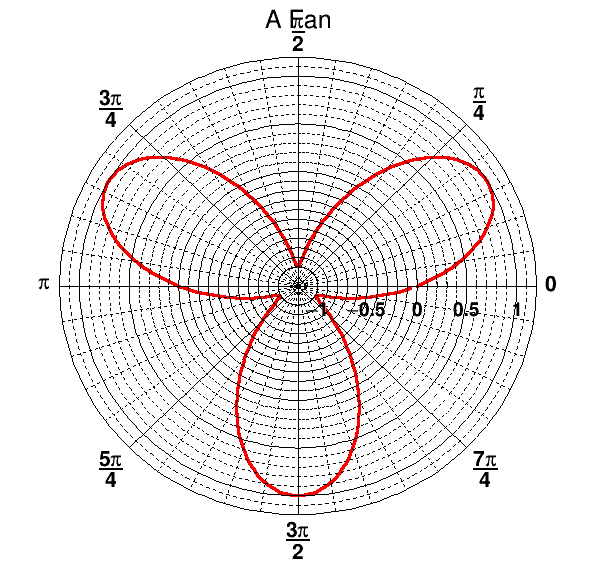

In [8]:
# Builds a polar graph in a square Canvas.

from ROOT import TGraphPolar, TCanvas, TMath
from array import array

canvas_8_1_sq = TCanvas("canvas_8_1_sq","myCanvas",600,600)
rmin = 0.
rmax = TMath.Pi()*6.
npoints = 300
r = array('d',[0]*npoints)
theta  = array('d',[0]*npoints)
for ipt in xrange(0,npoints):
    r[ipt] = ipt*(rmax-rmin)/npoints+rmin
    theta[ipt] = TMath.Sin(r[ipt])

grP1 = TGraphPolar(npoints,r,theta)
grP1.SetTitle("A Fan")
grP1.SetLineWidth(3)
grP1.SetLineColor(2)
grP1.DrawClone("L")
grP1.Draw()
canvas_8_1_sq.Draw()


### 8.1.1 More Python- less C++

You may have noticed already that there are some Python modules providing functionality similar to ROOT classes, which fit more seamlessly into your Python code.

A more “pythonic” version of the above macro3 would use a replacement of the ROOT class TMath for the provisoining of data to TGraphPolar. With the math package, the part of the code becomes

    import math
    from array import array
    from ROOT import TCanvas , TGraphPolar
    ...
    ipt=range(0,npoints)
    r=array('d',map(lambda x: x*(rmax-rmin)/(npoints-1.)+rmin,ipt))
    theta=array('d',map(math.sin,r))
    e=array('d',npoints*[0.])
    ...

#### 8.1.1.1 Customised Binning

This example combines comfortable handling of arrays in Python to define variable bin sizes of a ROOT histogram. All we need to know is the interface of the relevant ROOT class and its methods (from the ROOT documentation):

    TH1F(const char* name , const char* title , Int_t nbinsx , const Double_t* xbins)

Here is the Python code:

In [9]:
%jsroot on

In [10]:
import ROOT
from array import array
canvas_8_1_1 = TCanvas("canvas_8_1_1","myCanvas")
arrBins = array('d' ,(1 ,4 ,9 ,16) ) # array of bin edges
histogram_8_1 = ROOT.TH1F("histogram_8_1", "histogram_8_1", len(arrBins)-1, arrBins)
# fill it with equally spaced numbers
for i in range (1 ,16) :
   histogram_8_1.Fill(i)
histogram_8_1.Draw ()
canvas_8_1_1.Draw ()

## 8.2 Custom code: from C++ to Python

The ROOT interpreter and type sytem offer interesting possibilities when it comes to JITting of C++ code. Take for example this header file, containing a class and a function.

In [11]:
%%cpp
#include "stdio.h"
class A1{
    public:
    A1(int i):m_i(i){}
    int getI() const {return m_i;}
    
    private:
    int m_i=0;
};

 

In [12]:
%%cpp
void printA(const A1& a ){
    printf ("The value of A instance is %i.\n",a.getI());
}   

This example might seem trivial, but it shows a powerful ROOT feature. C++ code can be JITted within PyROOT and the entities defined in C++ can be transparently used in Python!

In [13]:
>>> import ROOT
>>> ROOT.gInterpreter.ProcessLine('#include "../data/cpp2pythonExample.h"')
>>> a = ROOT.A(123)
>>> ROOT.printA(a)

The value of A instance is 123.


### ROOT-Primer Navigator

<p id="nav-felt" style="possition:relative; width:50%; float:left;"><a href="7-File-IO-and-Parallel-Analysis.ipynb">&lt;&lt; Previous Chapter 7 File IO and Parallel Analysis</a></p>
<p id="nav-right" style="possition:relative; width:45%; float:left; text-align:right;"><a href="9-Concluding-Remarks.ipynb">Next Chapter 9 Concluding Remarks &gt;&gt;</a></p>